# Teoría de Grafos

In [192]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Recursos

- [Documentación de NetworkX](https://networkx.org/documentation/stable/)
- [Tutorial de NetworkX](https://networkx.org/documentation/stable/tutorial.html)
- [Referencia API de NetworkX](https://networkx.org/documentation/stable/reference/index.html)
- [Gephi - Software de Visualización de Grafos](https://gephi.org/)
- [Network Science Book - Datasets](https://networksciencebook.com/translations/en/resources/data.html)


In [193]:
def draw_graph(G):
    """
    Draws a graph using NetworkX and Matplotlib.
    Works with both Graph and DiGraph.
    Automatically displays edge weights if present.

    Parameters:
    -----------
    G : networkx.Graph or networkx.DiGraph
        The graph to draw
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    # Dibujar con flechas si es un grafo dirigido
    if G.is_directed():
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_size=16,
            font_weight="bold",
            edge_color="black",
            width=2,
            arrows=True,
            arrowsize=20,
            arrowstyle="->",
            connectionstyle="arc3,rad=0.1",
        )
    else:
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_size=16,
            font_weight="bold",
            edge_color="black",
            width=2,
        )

    # Dibujar los pesos de las aristas si existen
    edge_labels = nx.get_edge_attributes(G, "weight")
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.axis("off")
    plt.show()

## Grafo

In [194]:
# Crear un grafo con N=4 nodos y L=4 aristas
G = nx.Graph()

# Agregar nodos
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Agregar aristas
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)

# Imprimir información del grafo
print(f"Cantidad de nodos (N): {G.number_of_nodes()}")
print(f"Cantidad de aristas (L): {G.number_of_edges()}")
print(f"Aristas: {list(G.edges())}")

Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas: [(1, 2), (1, 3), (2, 3), (2, 4)]



Grado de cada nodo: {1: 2, 2: 3, 3: 2, 4: 1}
Grado promedio: 2.0
Grado promedio (usando 2L/N): 2.0


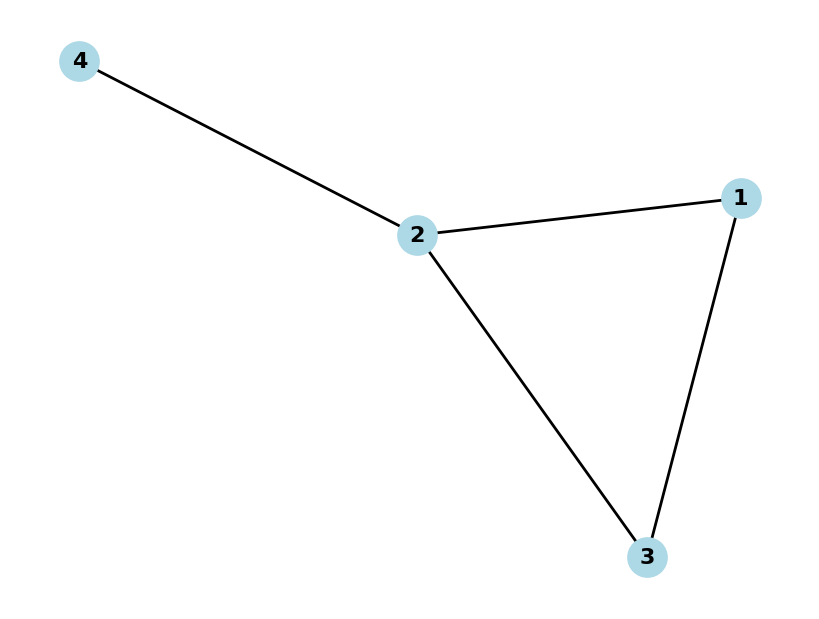

In [195]:
# Información sobre grados
# (necesitamos convertir los grados a un diccionario para calcular el promedio)
degrees = dict(G.degree())
print()
print(f"Grado de cada nodo: {degrees}")

# Grado promedio
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print(f"Grado promedio: {avg_degree}")

# Fórmula alternativa: <k> = 2L/N
avg_degree_formula = (2 * G.number_of_edges()) / G.number_of_nodes()
print(f"Grado promedio (usando 2L/N): {avg_degree_formula}")

# Dibujar
draw_graph(G)

### Operaciones básicas sobre grafos

In [196]:
# Operaciones básicas sobre grafos

# Número de nodos y aristas
N = G.number_of_nodes()
L = G.number_of_edges()
print(f"Nodos: {N}, Aristas: {L}")

# Lista de todos los nodos
nodes = list(G.nodes())
print()
print(f"Lista de nodos: {nodes}")

# Lista de todas las aristas
edges = list(G.edges())
print(f"Lista de aristas: {edges}")

# Verificar si un nodo existe en el grafo
node_exists = G.has_node(1)
print()
print(f"¿El nodo 1 existe? {node_exists}")
print(f"¿El nodo 10 existe? {G.has_node(10)}")

# Verificar si una arista existe en el grafo
edge_exists = G.has_edge(1, 2)
print()
print(f"¿La arista (1,2) existe? {edge_exists}")
print(f"¿La arista (1,4) existe? {G.has_edge(1, 4)}")

# Los vecinos de un nodo
neighbors_1 = list(G.neighbors(1))
print()
print(f"Vecinos del nodo 1: {neighbors_1}")

neighbors_2 = list(G.adj[2]) # Equivalente a G.neighbors(2)
print(f"Vecinos del nodo 2: {neighbors_2}")

# El grado de un nodo específico
degree_1 = G.degree(1)
print()
print(f"Grado del nodo 1: {degree_1}")
print(f"Grado del nodo 2: {G.degree(2)}")

Nodos: 4, Aristas: 4

Lista de nodos: [1, 2, 3, 4]
Lista de aristas: [(1, 2), (1, 3), (2, 3), (2, 4)]

¿El nodo 1 existe? True
¿El nodo 10 existe? False

¿La arista (1,2) existe? True
¿La arista (1,4) existe? False

Vecinos del nodo 1: [2, 3]
Vecinos del nodo 2: [1, 3, 4]

Grado del nodo 1: 2
Grado del nodo 2: 3


### Propiedades estructurales del grafo

In [197]:
# Verificar si el grafo está conectado
is_connected = nx.is_connected(G)
print(f"¿El grafo está conectado? {is_connected}")

# Cantidad de componentes conexas
num_components = nx.number_connected_components(G)
print()
print(f"Número de componentes conexas: {num_components}")

# Componentes conexas
components = list(nx.connected_components(G))
print(f"Componentes conexas:")
for i, component in enumerate(components, 1):
    print(f"   Componente {i}: {component}")

# Obtener la componente conexa más grande
largest_component = max(nx.connected_components(G), key=len)
print()
print(f"Componente conexa más grande: {largest_component}")
print(f"Tamaño: {len(largest_component)} nodos")

# Subgrafo inducido por un conjunto de nodos
subgraph_nodes = [1, 2, 3]
subgraph = G.subgraph(subgraph_nodes)
print()
print(f"Subgrafo inducido por nodos {subgraph_nodes}:")
print(f"Nodos: {list(subgraph.nodes())}")
print(f"Aristas: {list(subgraph.edges())}")

¿El grafo está conectado? True

Número de componentes conexas: 1
Componentes conexas:
   Componente 1: {1, 2, 3, 4}

Componente conexa más grande: {1, 2, 3, 4}
Tamaño: 4 nodos

Subgrafo inducido por nodos [1, 2, 3]:
Nodos: [1, 2, 3]
Aristas: [(1, 2), (1, 3), (2, 3)]


In [198]:
# Grabar grafo como lista de adyacencia
nx.write_adjlist(G, "networks/graph_adjacency_list.txt")


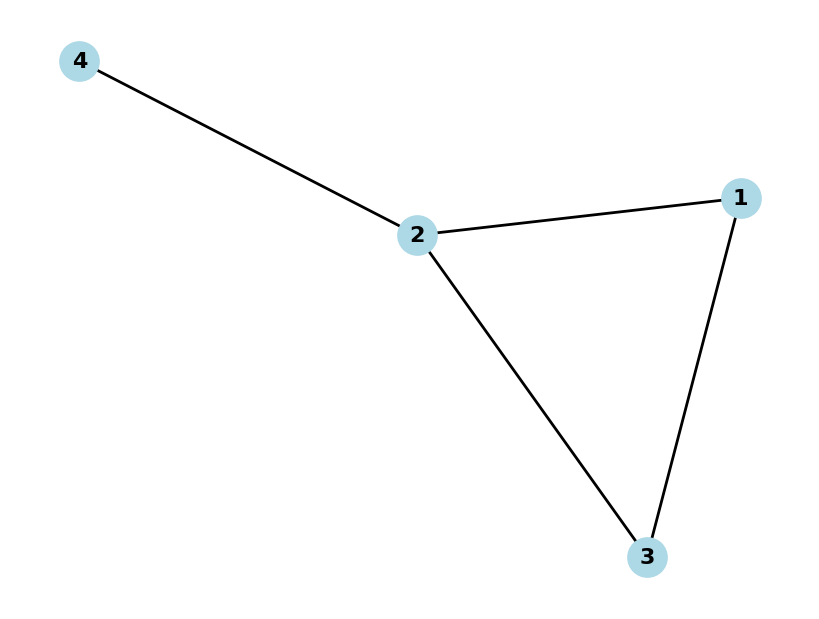

In [199]:
# Cargar grafo desde lista de adyacencia
G = nx.read_adjlist("networks/graph_adjacency_list.txt")

draw_graph(G)

## Grafo Dirigido

Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas: [(1, 2), (1, 3), (2, 3), (2, 4)]


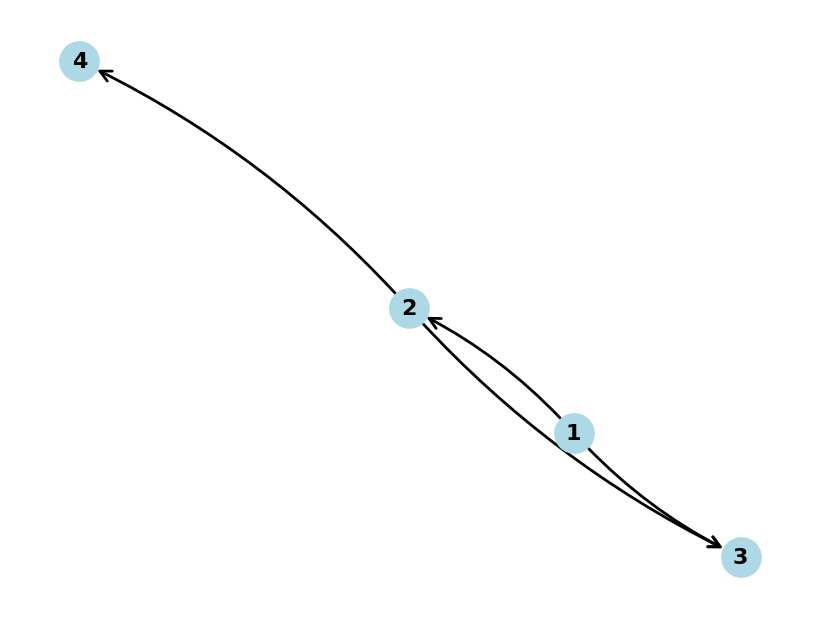

In [200]:
# Grafo dirigido con N=4 nodos y L=4 aristas
DG = nx.DiGraph()

# Aristas dirigidas (los nodos se agregan automáticamente)
edges = [(1, 2), (1, 3), (2, 3), (2, 4)]
DG.add_edges_from(edges)

# Información del grafo
print(f"Cantidad de nodos (N): {DG.number_of_nodes()}")
print(f"Cantidad de aristas (L): {DG.number_of_edges()}")
print(f"Aristas: {list(DG.edges())}")

# Dibujar
draw_graph(DG)

Grafo dirigido con aristas bidireccionales:
Aristas: [(1, 2), (1, 3), (2, 1), (2, 4), (3, 2), (4, 2)]


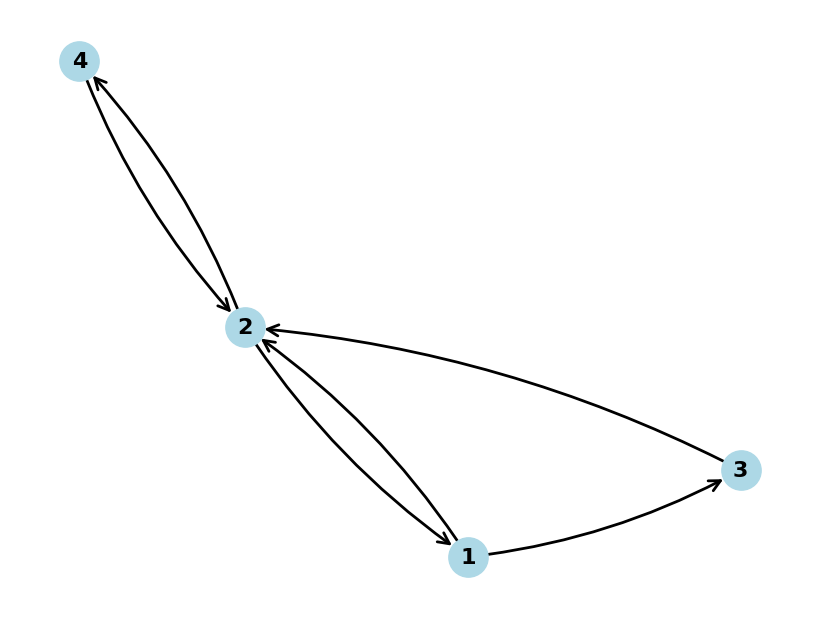

In [201]:
# Grafo dirigido con aristas bidireccionales
DG2 = nx.DiGraph()

# Agregar aristas en ambas direcciones para algunas conexiones
edges = [
    (1, 2),
    (2, 1),  # Bidireccional entre 1 y 2
    (1, 3),  # Solo 1 -> 3
    (3, 2),  # Solo 3 -> 2
    (2, 4),
    (4, 2),
]  # Bidireccional entre 2 y 4

DG2.add_edges_from(edges)

print(f"Grafo dirigido con aristas bidireccionales:")
print(f"Aristas: {list(DG2.edges())}")
draw_graph(DG2)

# Grafo Ponderado (Weighted Graph)

Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas con pesos: [(1, 2, 5), (1, 3, 3), (2, 3, 7), (2, 4, 2)]


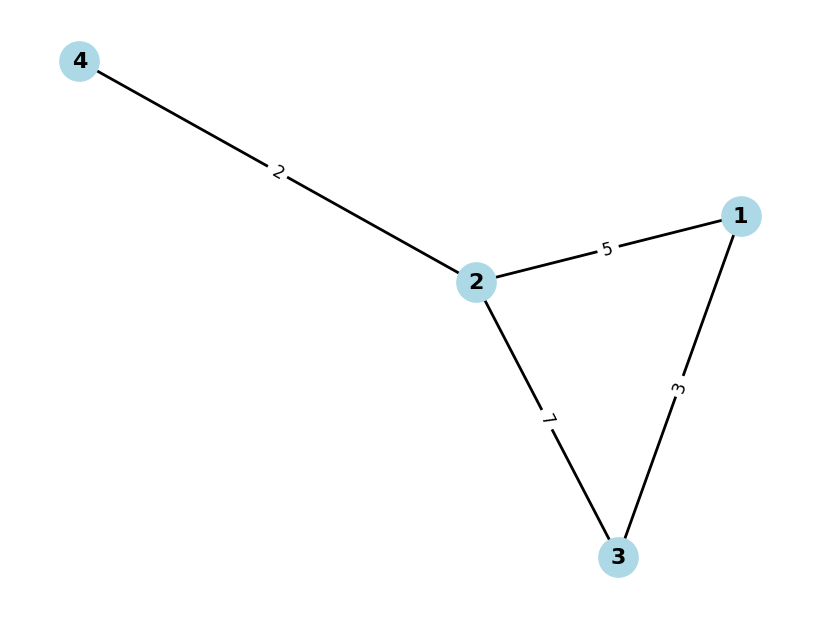

In [202]:
# Crear un grafo ponderado con N=4 nodos y L=4 aristas
GW = nx.Graph()

# Nodos
GW.add_node(1)
GW.add_node(2)
GW.add_node(3)
GW.add_node(4)

# Aristas
GW.add_edge(1, 2, weight=5)
GW.add_edge(1, 3, weight=3)
GW.add_edge(2, 3, weight=7)
GW.add_edge(2, 4, weight=2)

# Información del grafo
print(f"Cantidad de nodos (N): {GW.number_of_nodes()}")
print(f"Cantidad de aristas (L): {GW.number_of_edges()}")
print(f"Aristas con pesos: {list(GW.edges(data='weight'))}")

# Dibujar el grafo ponderado
draw_graph(GW)

In [203]:
# Grabar grafo como lista de ejes con pesos
nx.write_weighted_edgelist(GW, "networks/graph_weighted_edges.txt")

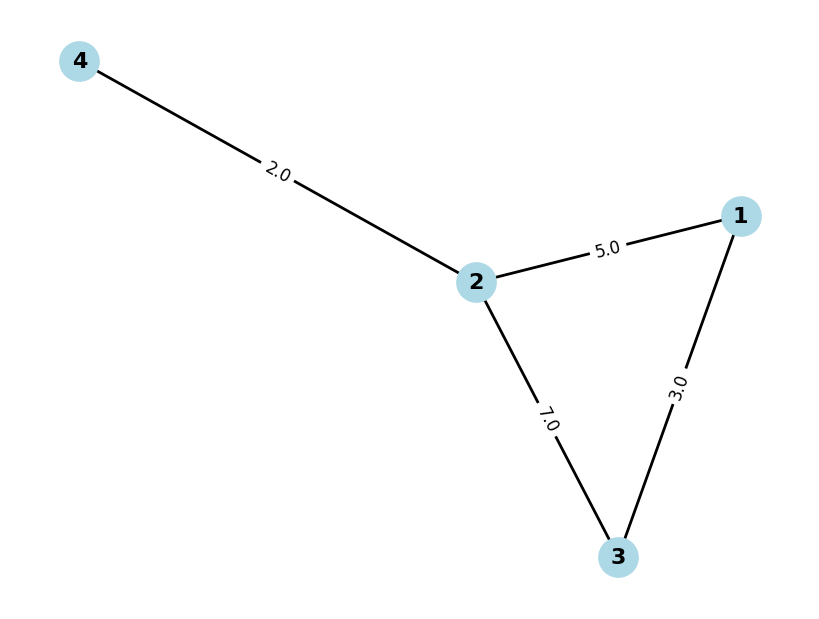

In [204]:
# Cargar grafo lista de ejes con pesos
GW_weighted = nx.read_weighted_edgelist(
    "networks/graph_weighted_edges.txt",
    create_using=nx.Graph(),
)

draw_graph(GW_weighted)

## Red de llamadas telefónicas

In [205]:
# Cargar el grafo de llamadas telefónicas desde edgelist como grafo dirigido
phone_graph = nx.read_edgelist(
    "networks/phonecalls.edgelist.txt", create_using=nx.DiGraph()
)

# Imprimir información básica sobre el grafo
print(f"Red de llamadas telefónicas (Dirigida):")
print(f"Cantidad de nodos (N): {phone_graph.number_of_nodes()}")
print(f"Cantidad de aristas (L): {phone_graph.number_of_edges()}")

# Calcular e imprimir estadísticas de grados para grafos dirigidos
in_degrees = dict(phone_graph.in_degree())
out_degrees = dict(phone_graph.out_degree())

avg_in_degree = sum(in_degrees.values()) / phone_graph.number_of_nodes()
avg_out_degree = sum(out_degrees.values()) / phone_graph.number_of_nodes()

print()
print(f"Grado de entrada promedio: {avg_in_degree:.2f}")
print(f"Grado de salida promedio: {avg_out_degree:.2f}")

# Mostrar grados mínimos y máximos
print()
print(
    f"Rango de grado de entrada: {min(in_degrees.values())} a {max(in_degrees.values())}"
)
print(
    f"Rango de grado de salida: {min(out_degrees.values())} a {max(out_degrees.values())}"
)

Red de llamadas telefónicas (Dirigida):
Cantidad de nodos (N): 36595
Cantidad de aristas (L): 91826

Grado de entrada promedio: 2.51
Grado de salida promedio: 2.51

Rango de grado de entrada: 0 a 77
Rango de grado de salida: 0 a 41


## Distribución de Grados

La distribución de grados, $p_k$, es la probabilidad de que un nodo seleccionado aleatoriamente en la red tenga grado $k$.

Para una red con $N$ nodos, la distribución de grados es el histograma normalizado:

$$p_k = \frac{N_k}{N}$$

donde $N_k$ es la cantidad de nodos con grado $k$.

El grado promedio puede calcularse como:

$$\langle k \rangle = \sum_{k=0}^{\infty} k \cdot p_k$$


In [207]:
import numpy as np

# Obtener diccionarios de grados para la red telefónica
in_degrees = dict(phone_graph.in_degree())
out_degrees = dict(phone_graph.out_degree())

# Calcular el grado total (entrada + salida) para cada nodo
total_degrees = {}
for node in phone_graph.nodes():
    total_degrees[node] = in_degrees[node] + out_degrees[node]

# Cantidad total de nodos
N = phone_graph.number_of_nodes()

# --- Distribución de grado de entrada ---
# Contar cuántos nodos tienen cada valor de grado (N_k)
degree_counts_in = {}
for degree in in_degrees.values():
    if degree in degree_counts_in:
        degree_counts_in[degree] += 1
    else:
        degree_counts_in[degree] = 1

# Crear arrays para k y p_k
k_in = np.array(sorted(degree_counts_in.keys()))
p_k_in = np.zeros(len(k_in))
for i, k in enumerate(k_in):
    p_k_in[i] = degree_counts_in[k] / N

# --- Distribución de grado de salida ---
degree_counts_out = {}
for degree in out_degrees.values():
    if degree in degree_counts_out:
        degree_counts_out[degree] += 1
    else:
        degree_counts_out[degree] = 1

k_out = np.array(sorted(degree_counts_out.keys()))
p_k_out = np.zeros(len(k_out))
for i, k in enumerate(k_out):
    p_k_out[i] = degree_counts_out[k] / N

# --- Distribución de grado total ---
degree_counts_total = {}
for degree in total_degrees.values():
    if degree in degree_counts_total:
        degree_counts_total[degree] += 1
    else:
        degree_counts_total[degree] = 1

k_total = np.array(sorted(degree_counts_total.keys()))
p_k_total = np.zeros(len(k_total))
for i, k in enumerate(k_total):
    p_k_total[i] = degree_counts_total[k] / N

# Calcular grado promedio usando: <k> = sum(k * p_k)
avg_k_in = np.sum(k_in * p_k_in)
avg_k_out = np.sum(k_out * p_k_out)
avg_k_total = np.sum(k_total * p_k_total)

print("Análisis de Distribución de Grados:")
print()
print(f"Distribución de Grado de Entrada:")
print(f"  Grado promedio <k_in> = {avg_k_in:.4f}")
print(f"  Rango de grados: {k_in.min()} a {k_in.max()}")
print(f"  Cantidad de grados diferentes: {len(k_in)}")

print()
print(f"Distribución de Grado de Salida:")
print(f"  Grado promedio <k_out> = {avg_k_out:.4f}")
print(f"  Rango de grados: {k_out.min()} a {k_out.max()}")
print(f"  Cantidad de grados diferentes: {len(k_out)}")

print()
print(f"Distribución de Grado Total:")
print(f"  Grado promedio <k_total> = {avg_k_total:.4f}")
print(f"  Rango de grados: {k_total.min()} a {k_total.max()}")
print(f"  Cantidad de grados diferentes: {len(k_total)}")

# Verificar normalización: la suma de p_k debe ser igual a 1
print()
print(f"Verificación (la suma de p_k debe ser 1.0):")
print(f"  sum(p_k_in) = {np.sum(p_k_in):.6f}")
print(f"  sum(p_k_out) = {np.sum(p_k_out):.6f}")
print(f"  sum(p_k_total) = {np.sum(p_k_total):.6f}")

Análisis de Distribución de Grados:

Distribución de Grado de Entrada:
  Grado promedio <k_in> = 2.5092
  Rango de grados: 0 a 77
  Cantidad de grados diferentes: 32

Distribución de Grado de Salida:
  Grado promedio <k_out> = 2.5092
  Rango de grados: 0 a 41
  Cantidad de grados diferentes: 35

Distribución de Grado Total:
  Grado promedio <k_total> = 5.0185
  Rango de grados: 1 a 102
  Cantidad de grados diferentes: 55

Verificación (la suma de p_k debe ser 1.0):
  sum(p_k_in) = 1.000000
  sum(p_k_out) = 1.000000
  sum(p_k_total) = 1.000000


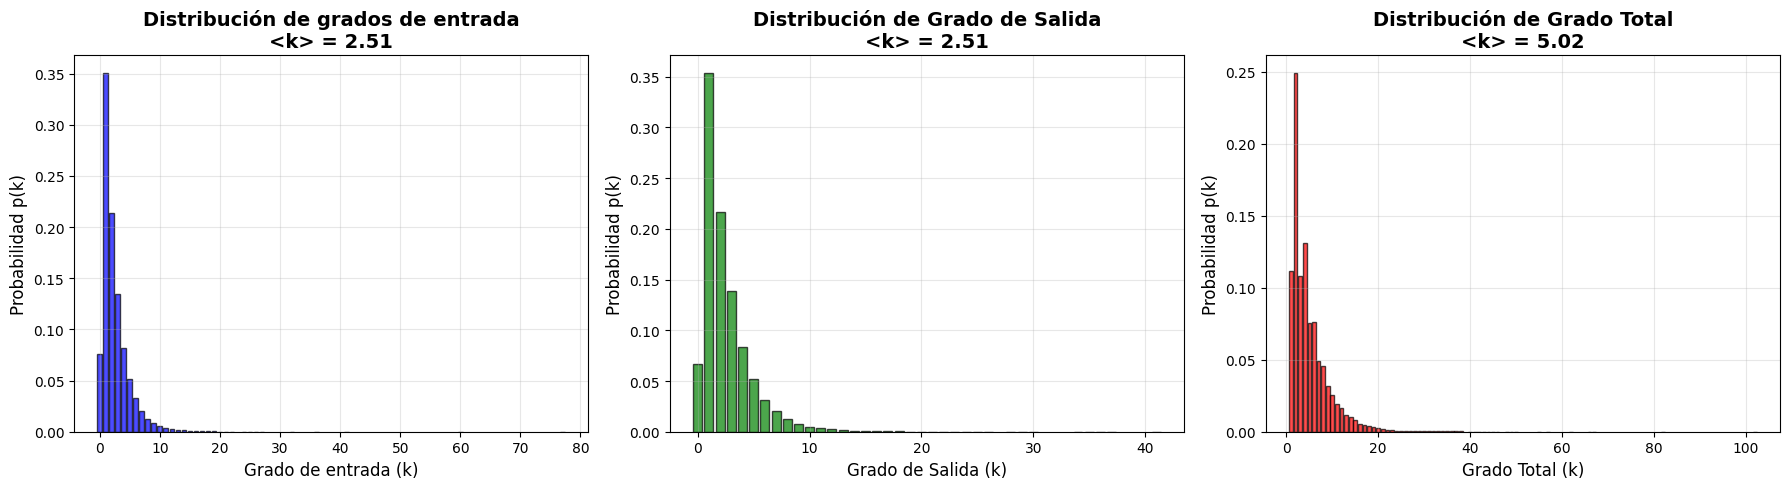

In [208]:
# Visualizar las distribuciones de grados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de grado de entrada
axes[0].bar(k_in, p_k_in, width=0.8, alpha=0.7, color="blue", edgecolor="black")
axes[0].set_xlabel("Grado de entrada (k)", fontsize=12)
axes[0].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[0].set_title(
    f"Distribución de grados de entrada\n<k> = {avg_k_in:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[0].grid(True, alpha=0.3)

# Distribución de Grado de Salida
axes[1].bar(k_out, p_k_out, width=0.8, alpha=0.7, color="green", edgecolor="black")
axes[1].set_xlabel("Grado de Salida (k)", fontsize=12)
axes[1].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[1].set_title(
    f"Distribución de Grado de Salida\n<k> = {avg_k_out:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[1].grid(True, alpha=0.3)

# Distribución de Grado Total
axes[2].bar(k_total, p_k_total, width=0.8, alpha=0.7, color="red", edgecolor="black")
axes[2].set_xlabel("Grado Total (k)", fontsize=12)
axes[2].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[2].set_title(
    f"Distribución de Grado Total\n<k> = {avg_k_total:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Grados de los primeros 10 nodos: [36, 20, 5, 12, 6, 2, 6, 3, 2, 7]


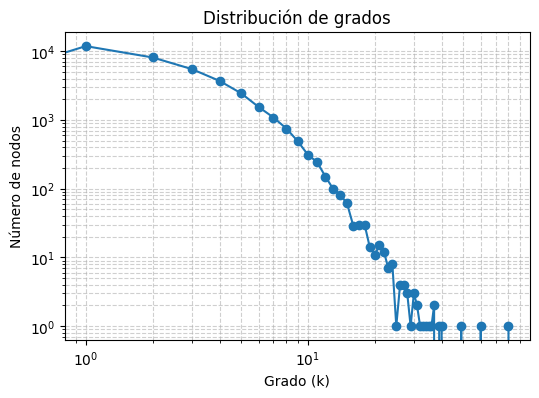

In [206]:
G = nx.read_edgelist("networks/phonecalls.edgelist.txt")

# Lista de grados
degrees = [d for n, d in G.degree()]
print("Grados de los primeros 10 nodos:", degrees[:10])

# Histograma de grados
degree_count = nx.degree_histogram(G)

# Distribución normalizada
degree_prob = np.array(degree_count) / sum(degree_count)

# Mostrar distribución 
# for k, p in enumerate(degree_prob):
#     if p > 0:
#         print(f"Grado {k}: probabilidad {p:.4f}")

# Gráfico en escala log-log
plt.figure(figsize=(6,4))
plt.loglog(range(len(degree_count)), degree_count, marker='o')
plt.xlabel("Grado (k)")
plt.ylabel("Número de nodos")
plt.title("Distribución de grados")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

## Grafo Completo

Grafo Completo K_5:
Cantidad de nodos (N): 5
Cantidad de aristas (L): 10
Aristas según fórmula N(N-1)/2: 10.0

Grado de cada nodo: {0: 4, 1: 4, 2: 4, 3: 4, 4: 4}
Cada nodo tiene grado k = N-1 = 4
Grado promedio: 4.0


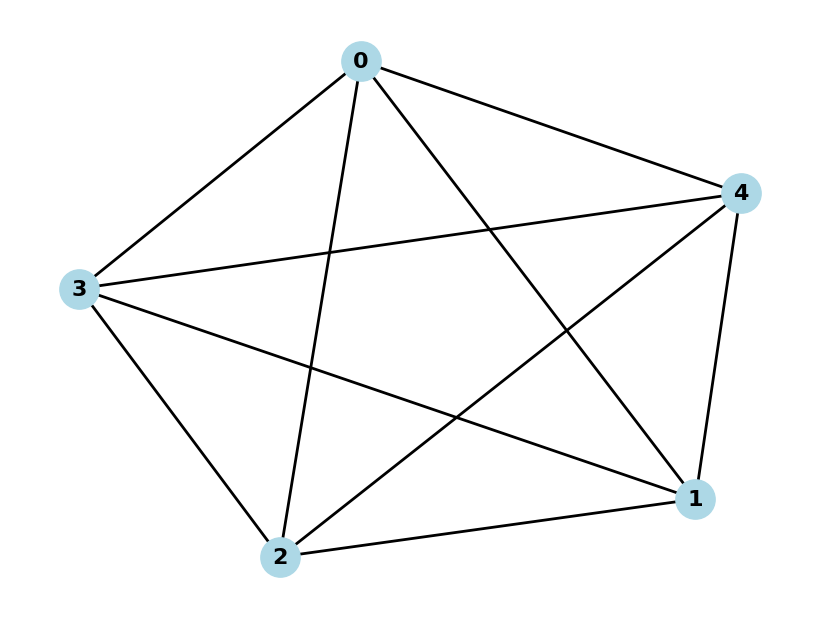

In [209]:
# Un grafo completo con N=5 nodos (K_5)
K5 = nx.complete_graph(5)

# Información del grafo
N = K5.number_of_nodes()
L = K5.number_of_edges()

print(f"Grafo Completo K_{N}:")
print(f"Cantidad de nodos (N): {N}")
print(f"Cantidad de aristas (L): {L}")

# Verificar la fórmula L = N(N-1)/2
L_formula = N * (N - 1) / 2
print(f"Aristas según fórmula N(N-1)/2: {L_formula}")

# Calcular grados
degrees = dict(K5.degree())
print()
print(f"Grado de cada nodo: {degrees}")
print(f"Cada nodo tiene grado k = N-1 = {N-1}")

# Calcular el grado promedio
avg_degree = sum(degrees.values()) / K5.number_of_nodes()
print(f"Grado promedio: {avg_degree}")

# Dibujar el grafo
draw_graph(K5)

## Grafo Bipartito

In [210]:
# Crear un grafo bipartito
B = nx.Graph()

# Definir dos conjuntos de nodos
students = ["María", "Juan", "Carlos", "Ana"]
courses = ["Matemáticas", "Física", "Química"]

# Agregar nodos con el atributo bipartito
# Conjunto 0 para estudiantes, Conjunto 1 para cursos
B.add_nodes_from(students, bipartite=0)
B.add_nodes_from(courses, bipartite=1)

# Agregar aristas (estudiantes inscriptos en cursos)
edges = [
    ("María", "Matemáticas"),
    ("María", "Física"),
    ("Juan", "Matemáticas"),
    ("Juan", "Química"),
    ("Carlos", "Física"),
    ("Carlos", "Química"),
    ("Ana", "Matemáticas"),
    ("Ana", "Física"),
    ("Ana", "Química"),
]

B.add_edges_from(edges)

# Imprimir información del grafo
print(f"Grafo Bipartito:")
print(f"Cantidad de nodos (N): {B.number_of_nodes()}")
print(f"Cantidad de aristas (L): {B.number_of_edges()}")
print()
print(f"Conjunto U (Estudiantes): {students}")
print(f"Conjunto V (Cursos): {courses}")

# Verificar que es bipartito
is_bipartite = nx.is_bipartite(B)
print()
print(f"Es bipartito: {is_bipartite}")


Grafo Bipartito:
Cantidad de nodos (N): 7
Cantidad de aristas (L): 9

Conjunto U (Estudiantes): ['María', 'Juan', 'Carlos', 'Ana']
Conjunto V (Cursos): ['Matemáticas', 'Física', 'Química']

Es bipartito: True


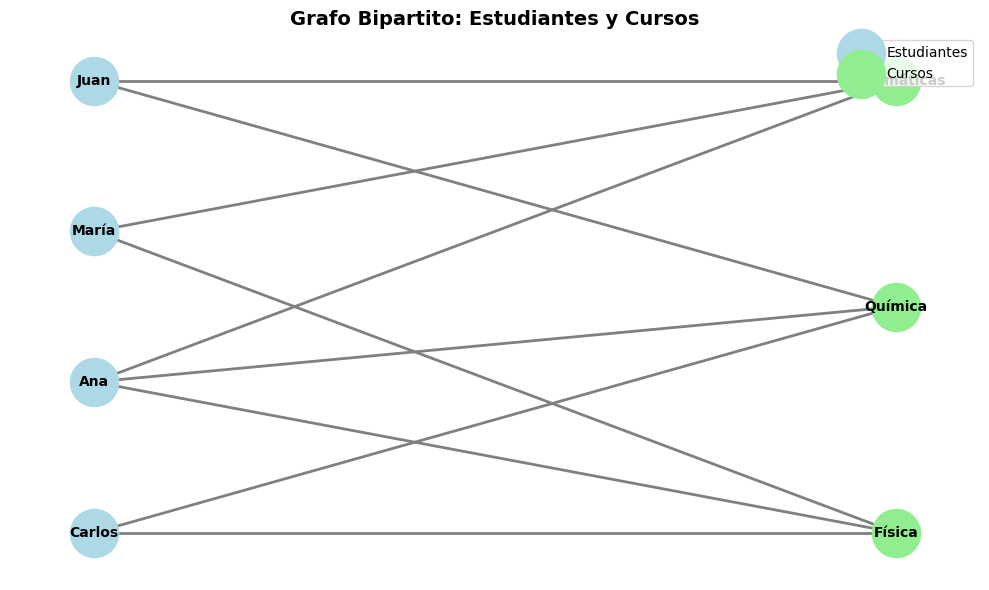

In [211]:
# Visualizar el grafo bipartito con un layout especializado
plt.figure(figsize=(10, 6))

# Usar layout bipartito para separar los dos conjuntos
pos = nx.bipartite_layout(B, students)

# Separar nodos por su atributo bipartito
top_nodes = students
bottom_nodes = courses

# Dibujar nodos de cada conjunto con diferentes colores
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=top_nodes,
    node_color="lightblue",
    node_size=1200,
    label="Estudiantes",
)
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=bottom_nodes,
    node_color="lightgreen",
    node_size=1200,
    label="Cursos",
)

# Dibujar aristas y etiquetas
nx.draw_networkx_edges(B, pos, edge_color="gray", width=2)
nx.draw_networkx_labels(B, pos, font_size=10, font_weight="bold")

plt.title("Grafo Bipartito: Estudiantes y Cursos", fontsize=14, fontweight="bold")
plt.legend(scatterpoints=1, loc="upper right")
plt.axis("off")
plt.tight_layout()
plt.show()

In [212]:
# Ejemplo: Proyección del grafo bipartito
# Podemos proyectar el grafo bipartito sobre uno de los conjuntos
# Esto crea conexiones entre nodos que comparten conexiones en el grafo original

# Proyectar sobre estudiantes: dos estudiantes están conectados si comparten un curso
student_projection = nx.bipartite.projected_graph(B, students)

print("Proyección de Estudiantes:")
print(f"Nodos: {list(student_projection.nodes())}")
print(f"Aristas: {list(student_projection.edges())}")
print()
print("Dos estudiantes están conectados si comparten al menos un curso.")


Proyección de Estudiantes:
Nodos: ['María', 'Juan', 'Carlos', 'Ana']
Aristas: [('María', 'Ana'), ('María', 'Carlos'), ('María', 'Juan'), ('Juan', 'Carlos'), ('Juan', 'Ana'), ('Carlos', 'Ana')]

Dos estudiantes están conectados si comparten al menos un curso.


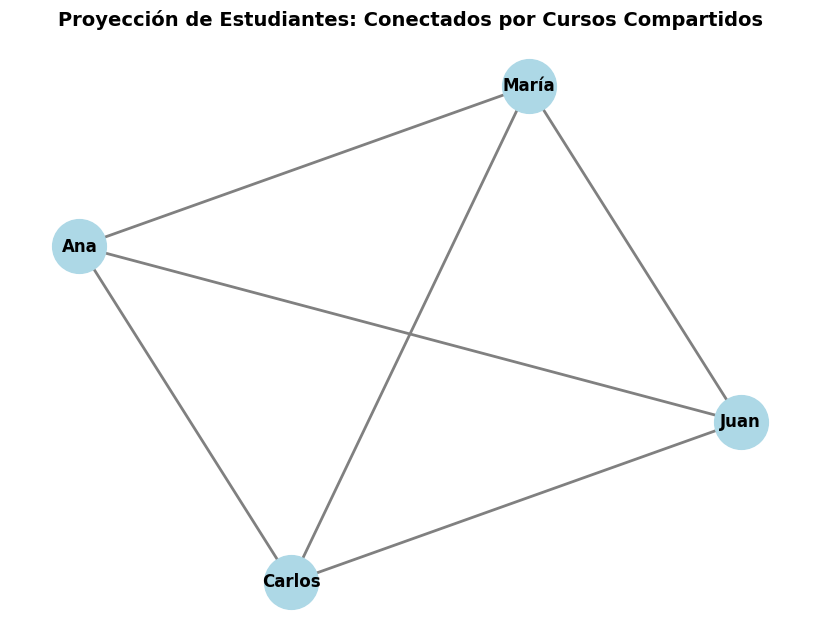

In [213]:
# Visualizar la proyección de estudiantes
plt.figure(figsize=(8, 6))
pos_proj = nx.spring_layout(student_projection, seed=42)
nx.draw(
    student_projection,
    pos_proj,
    with_labels=True,
    node_color="lightblue",
    node_size=1500,
    font_size=12,
    font_weight="bold",
    edge_color="gray",
    width=2,
)
plt.title(
    "Proyección de Estudiantes: Conectados por Cursos Compartidos",
    fontsize=14,
    fontweight="bold",
)
plt.axis("off")
plt.show()